**Snapshots**: https://www.tng-project.org/data/downloads/TNG300-1/

In [199]:
import numpy as np 
import pickle
import pandas as pd
from tqdm import tqdm

import multicam


In [200]:
import matplotlib.pyplot as plt


In [201]:
metadata_file = "../../data/processed/tng/tng300-1-table.csv"
tng_snapshot_dir = "../../data/processed/tng/TNG300-1/"  # everything is a host halo
tng_dark_snapshot_dir = "../../data/processed/tng/TNG300-1-Dark/"

trees_file = "../../data/processed/tng/TNG300-1_cut_trees.p"
present_snapfile = tng_snapshot_dir + "TNG300-1_HaloHistory_MBP_snap99.hdf5"

dark_trees_file = "../../data/processed/tng/TNG300-1-Dark_cut_trees.p"
present_dark_snapfile = tng_dark_snapshot_dir + "TNG300-1-Dark_HaloHistory_MBP_snap99.hdf5"

color_file = "../../data/processed/tng/Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc_099.hdf5"


# TNG300-1 

## Setup data

In [207]:
info = _setup_mah_and_cat(trees_file, present_snapfile, metadata_file, SNAPS)


/var/folders/yl/5w7yl6bn1tsc5fjrdtsrsjhh0000gn/T/ipykernel_86628/3987759832.py:4: RuntimeWarning: divide by zero encountered in log10
  return np.where(gmass > 0, np.log10(gmass * 1e10 / TNG_H), 0)


In [208]:
mah, cat, scales, snaps = info['mah'], info['present_cat'], info['scales'], info['snaps']
m_peak = info['m_peak']
trees = info['trees']
gmass = info['gmass']


In [209]:
assert len(cat) == len(mah) == len(trees) == len(m_peak)


## Example MAHs

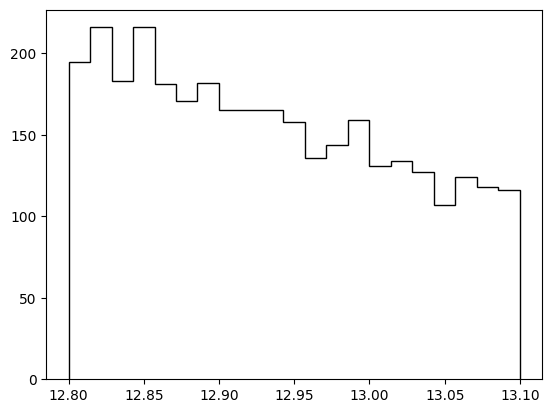

In [210]:
# double check
plt.hist(gmass, bins=21, histtype='step', color='k', label='gmass');


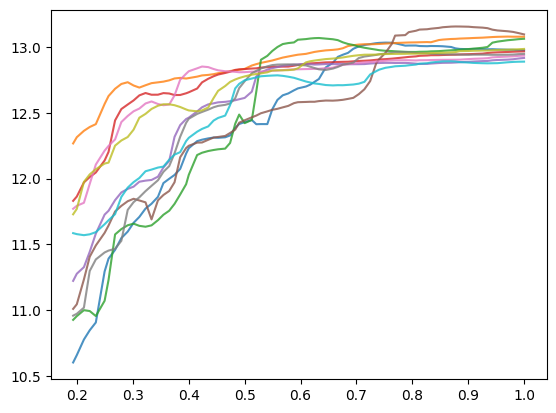

In [211]:
# plot 10 random mah as a function of scale 
for ii in range(10):
    idx = np.random.randint(0, len(mah))
    plt.plot(scales, mah[idx], '-', alpha=0.8
    );
# plt.plot(scales, mah.T, '-', alpha=0.1, c='k');


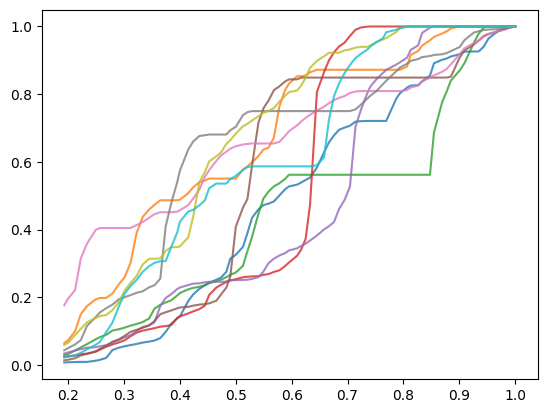

In [213]:
# plot 10 random m_peaks as a function of scale 
for ii in range(10):
    idx = np.random.randint(0, len(mah))
    plt.plot(scales, m_peak[idx], '-', alpha=0.8
    );


## Mean stellar mass - halo mass relation

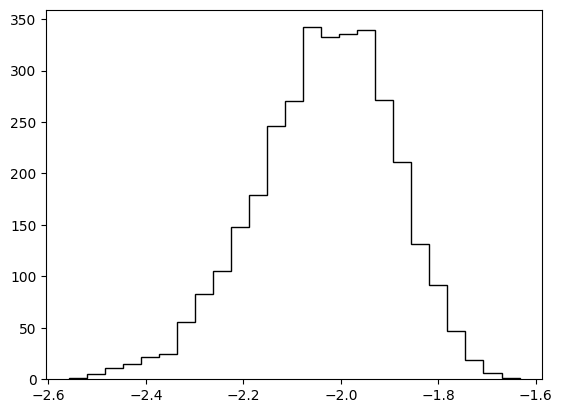

In [214]:
ratio = np.log10(10**cat['Mstar_30pkpc'] / 10**gmass)
ratio = ratio.values

plt.hist(ratio, bins=25, histtype='step', color='k', label='M_{\star} / M_{vir}');


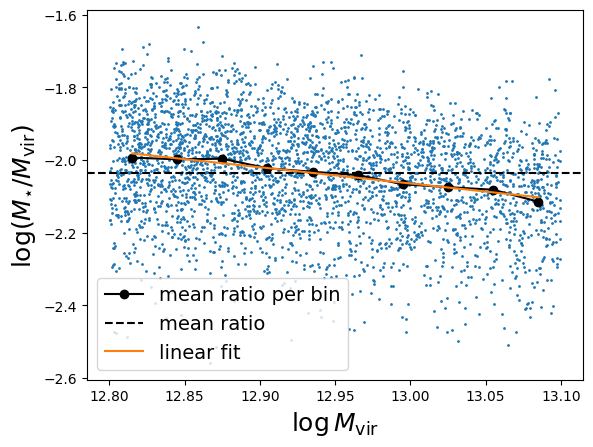

In [215]:
mvir = gmass

plt.scatter(mvir, ratio, s=1, alpha=1)

# compute mean ratio in bins of mvir
bins = np.linspace(12.8, 13.1, 11)
mean_ratio_per_bin = np.zeros(len(bins) - 1)
for ii in range(len(bins) - 1):
    idx = np.where((mvir > bins[ii]) & (mvir < bins[ii+1]))[0]
    mean_ratio_per_bin[ii] = np.mean(ratio[idx])

middle_point_of_bins = (bins[1:] + bins[:-1]) / 2
plt.plot(middle_point_of_bins, mean_ratio_per_bin, 'o-', c='k', label='mean ratio per bin')

plt.axhline(np.mean(ratio), c='k', ls='--', label='mean ratio')

# linear fit 
m, b = np.polyfit(middle_point_of_bins, mean_ratio_per_bin, 1)
plt.plot(middle_point_of_bins, m * middle_point_of_bins + b, '-', c="C1", label='linear fit')

plt.xlabel(r"$\log M_{\rm vir}$", fontsize=18)
plt.ylabel(r"$\log (M_{\star} / M_{\rm vir})$", fontsize=18)

plt.legend(loc='best', fontsize=14)


(array([  1.,   4.,   4.,  13.,  16.,  44.,  81., 104., 177., 212., 279.,
        348., 394., 444., 398., 337., 233., 133.,  51.,  16.,   4.]),
 array([-0.55352897, -0.50965346, -0.46577794, -0.42190243, -0.37802692,
        -0.33415141, -0.2902759 , -0.24640038, -0.20252487, -0.15864936,
        -0.11477385, -0.07089834, -0.02702282,  0.01685269,  0.0607282 ,
         0.10460371,  0.14847922,  0.19235474,  0.23623025,  0.28010576,
         0.32398127,  0.36785678]),
 [<matplotlib.patches.Polygon at 0x1320f8310>])

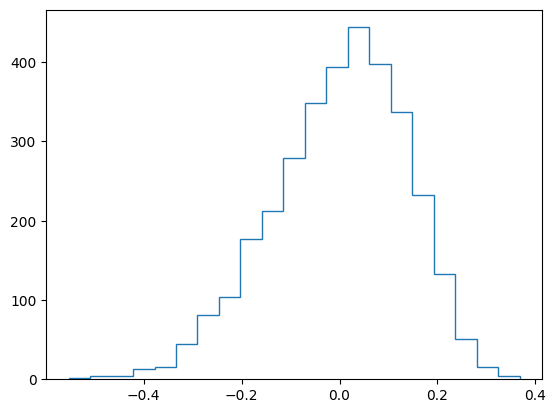

In [216]:
# finally, calculate deviation from mean log ratio
#  want \Delta Log ( M_star )
m_star_dev = cat['Mstar_30pkpc'] - np.log10(10**(m * mvir + b) * 10**mvir)
m_star_dev = m_star_dev.values

plt.hist(m_star_dev, histtype='step', bins=21)


## Colors

In [217]:
import h5py
f = h5py.File(color_file, 'r')


In [218]:
colnames = 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z', 'wfc_acs_f606w', 'des_y', 'jwst_f150w'
arr = f['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc'][:]

# average over projections 
arr = np.mean(arr, axis=-1) 
df_color = pd.DataFrame(arr, columns=colnames)

color_ids = f['subhaloIDs'][:]

f.close()


In [219]:
df_color


sdss_u     sdss_g     sdss_r     sdss_i     sdss_z  \
0        -21.223055 -23.152872 -24.002289 -24.423220 -24.798796   
1        -20.830639 -22.696707 -23.522802 -23.934675 -24.299194   
2        -20.300049 -22.166952 -22.994482 -23.407675 -23.770758   
3        -19.530867 -21.333979 -22.139311 -22.542494 -22.890219   
4        -19.527555 -21.335581 -22.142946 -22.547743 -22.897932   
...             ...        ...        ...        ...        ...   
14485704        NaN        NaN        NaN        NaN        NaN   
14485705        NaN        NaN        NaN        NaN        NaN   
14485706        NaN        NaN        NaN        NaN        NaN   
14485707        NaN        NaN        NaN        NaN        NaN   
14485708        NaN        NaN        NaN        NaN        NaN   

          wfc_acs_f606w      des_y  jwst_f150w  
0            -23.874680 -24.980883  -25.278311  
1            -23.398367 -24.472525  -24.762300  
2            -22.869898 -23.941442  -24.230139  
3            -22.017715 -23.050097  -23.330145  
4            -22.021103 -23.057770  -23.337908  
...                 ...        ...         ...  
14485704            NaN        NaN         NaN  
14485705            NaN        NaN         NaN  
14485706            NaN        NaN         NaN  
14485707            NaN        NaN         NaN  
14485708            NaN        NaN         NaN  

[14485709 rows x 8 columns]

In [220]:
#  now to match with haloes from present-day catalog
df_color = df_color.iloc[np.where(np.isin(color_ids,cat['SubhaloID'].values))[0]]
len(df_color)


3293

In [221]:
all(df_color.index.values == cat['SubhaloID'].values)


True

In [222]:
gr = df_color['sdss_g'] - df_color['sdss_r']
gr = gr.values


## Train MultiCAM

In [225]:
cat['gr'] = gr
cat['m_star_dev'] = m_star_dev


In [226]:
from multicam.models import MultiCAM
from multicam.correlations import spearmanr


In [227]:
x = m_peak
y = cat[['gr', 'm_star_dev']].values

model = MultiCAM(x.shape[1], y.shape[1])

x.shape, y.shape


((3293, 80), (3293, 2))

In [228]:
model.fit(x, y)


In [229]:
y_pred = model.predict(x)


In [230]:
print('gr', spearmanr(y[:, 0], y_pred[:, 0]))
print('m_star_dev', spearmanr(y[:, 1], y_pred[:, 1]))


gr 0.6375895439204181
m_star_dev 0.5797413030815208


In [231]:
multicam_corr = {'gr': spearmanr(y[:, 0], y_pred[:, 0]), 
                 'm_star_dev': spearmanr(y[:, 1], y_pred[:, 1])}


In [232]:
multicam_corr = {'gr': spearmanr(y[:, 0], y_pred[:, 0]), 
                 'm_star_dev': spearmanr(y[:, 1], y_pred[:, 1])}


## Create spearman correlation plots

In [233]:
exclude = ["HaloID", "SubhaloID", "SubhaloID_DMO", 'SubhaloID_LastDesc', 'Central', 'Main', 'EndState']


In [234]:
# compute all spearman correlations for every quantity not in exclude
from multicam.correlations import spearmanr
corrs = {} 
for col in cat.columns:
    if col not in exclude:
        corrs[col] = np.zeros(m_peak.shape[1]) * np.nan
        for jj in range(m_peak.shape[1]):
            corrs[col][jj] = spearmanr(cat[col].values, m_peak[:, jj])


/Users/imendoza/Library/Caches/pypoetry/virtualenvs/multicam-P7T5KfjX-py3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [235]:
# # now plot all correlations (each separately), save to png
# for col in cat.columns:
#     if col not in exclude:
#         plt.figure(figsize=(5, 5))
#         plt.plot(scales, corrs[col], '-', c='k')
#         plt.xlabel("a")
#         plt.ylabel("Spearman r")
#         plt.title(col)
#         plt.savefig(f"../../results/tng/figs/{col}.png", bbox_inches='tight')
#         plt.close()


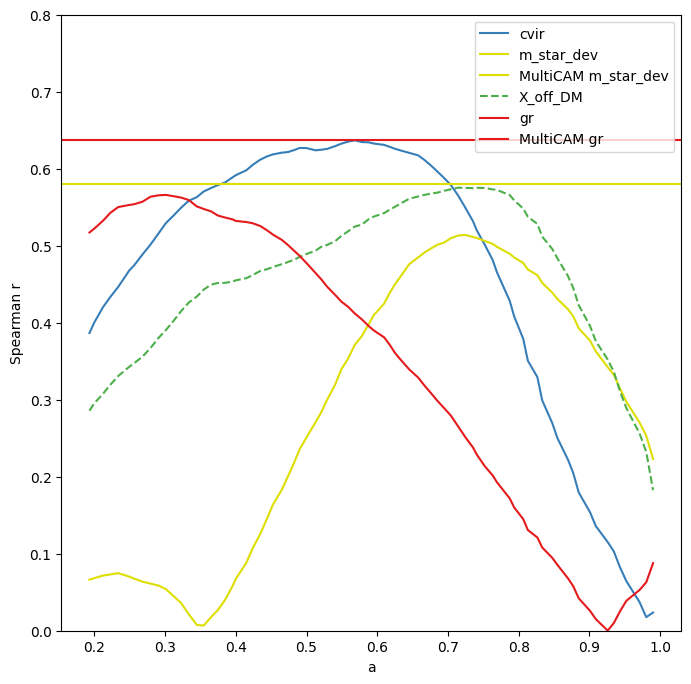

In [236]:
# now plot all correlations (separately), save to png
from multicam.plotting import CB_COLORS
colors_dict = {'cvir': CB_COLORS[0], 
               'Vmax_DM/V_vir_DM': CB_COLORS[1], 
               'X_off_DM': CB_COLORS[2], 
               'Spin_Bullock_DM': CB_COLORS[4],  
               'q_DM': CB_COLORS[5], 
                'gr': CB_COLORS[6],
                'm_star_dev': CB_COLORS[7],}
params = {'cvir',
        #   'Vmax_DM/V_vir_DM', 
          'X_off_DM', 
        #   'Spin_Bullock_DM', 
        #   'q_DM',
         'gr', 
         'm_star_dev'
         }
assert params.issubset(set(cat.columns))
assert params.issubset(set(corrs.keys()))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for param in params:
        sgn = (sum(corrs[param] > 0) - sum(corrs[param] < 0)) > 0
        style = '-' if sgn else '--'
        
        corr = np.abs(corrs[param])
        ax.plot(scales, corr, style, label=param, color=colors_dict[param])
        ax.set_xlabel("a")
        ax.set_ylabel("Spearman r")
        

        if param in ['gr', 'm_star_dev']:
                ax.axhline(multicam_corr[param], ls='-', c=colors_dict[param], label='MultiCAM {}'.format(param))
                
ax.set_ylim(0, 0.8)
ax.legend(loc='best')


## A(m) correlations

In [237]:
from scipy.interpolate import interp1d

def get_am_from_mpeak(m_peak, scales, min_mass_bin, n_bins=100, log_spacing=True): 
    assert np.sum(np.isnan(m_peak)) == 0, "m(a) needs to be filled with `fill_value` previously."

    # 1. + 2.
    if log_spacing:
        mass_bins = np.linspace(np.log(min_mass_bin), np.log(1.0), n_bins)
    else:
        mass_bins = np.log(np.linspace(min_mass_bin, 1.0, n_bins))


    fs = []
    for i in range(len(m_peak)):  # pylint: disable=consider-using-enumerate
        pairs = [(scales[0], m_peak[i][0])]
        count = 0
        for j in range(1, len(m_peak[i])):
            # keep only pairs that do NOT satisfy (a_{j-1}, Ma_{j-1}) = (a_j, Ma_j)
            if pairs[count][1] != m_peak[i][j]:
                pairs.append((scales[j], m_peak[i][j]))
                count += 1

        assert len(pairs) != 1, "Only 1 pair added, so max reached at a -> 0, impossible."

        _scales = np.array([pair[0] for pair in pairs])
        _m_peaks = np.array([pair[1] for pair in pairs])
        fs.append(
            interp1d(np.log(_m_peaks), np.log(_scales), bounds_error=False, fill_value=np.nan)
        )

    # 6.
    am = np.array([np.exp(f(mass_bins)) for f in fs])
    return am, np.exp(mass_bins)


In [272]:
am, mass_bins = get_am_from_mpeak(m_peak, scales, 0.1, n_bins=100, log_spacing=True)
assert np.sum(np.isnan(am)) == 0


AssertionError: 

In [278]:
keep_am = ~np.isnan(am.sum(axis=1))
_cat = cat.iloc[keep_am]
_am = am[keep_am]


In [281]:
_cat.shape


(3132, 213)

In [282]:
# compute all spearman correlations for every quantity not in exclude
from multicam.correlations import spearmanr
am_corrs = {} 
n_mass_bins = len(mass_bins)
for col in _cat.columns:
    if col not in exclude:
        am_corrs[col] = np.zeros(n_mass_bins) * np.nan
        for jj in range(n_mass_bins):
            am_corrs[col][jj] = spearmanr(_cat[col].values, _am[:, jj])


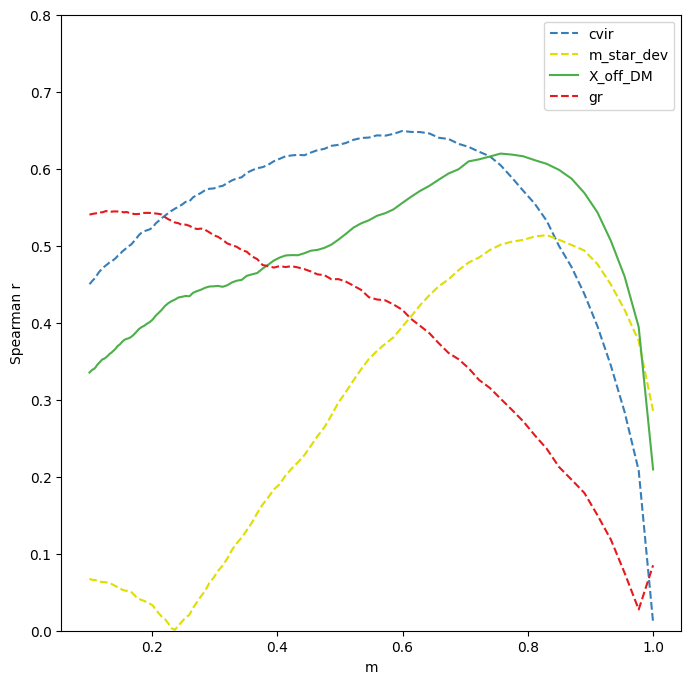

In [285]:
# now plot all correlations (separately), save to png
from multicam.plotting import CB_COLORS
colors_dict = {'cvir': CB_COLORS[0], 
               'Vmax_DM/V_vir_DM': CB_COLORS[1], 
               'X_off_DM': CB_COLORS[2], 
               'Spin_Bullock_DM': CB_COLORS[4],  
               'q_DM': CB_COLORS[5], 
                'gr': CB_COLORS[6],
                'm_star_dev': CB_COLORS[7],}
params = {'cvir',
        #   'Vmax_DM/V_vir_DM', 
          'X_off_DM', 
        #   'Spin_Bullock_DM', 
        #   'q_DM',
         'gr', 
         'm_star_dev'
         }
assert params.issubset(set(_cat.columns))
assert params.issubset(set(am_corrs.keys()))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for param in params:
        sgn = (sum(am_corrs[param] > 0) - sum(am_corrs[param] < 0)) > 0
        style = '-' if sgn else '--'
        
        corr = np.abs(am_corrs[param])
        ax.plot(mass_bins, corr, style, label=param, color=colors_dict[param])
        ax.set_xlabel("m")
        ax.set_ylabel("Spearman r")
        

ax.set_ylim(0, 0.8)
ax.legend(loc='best')


## Marginal distributions

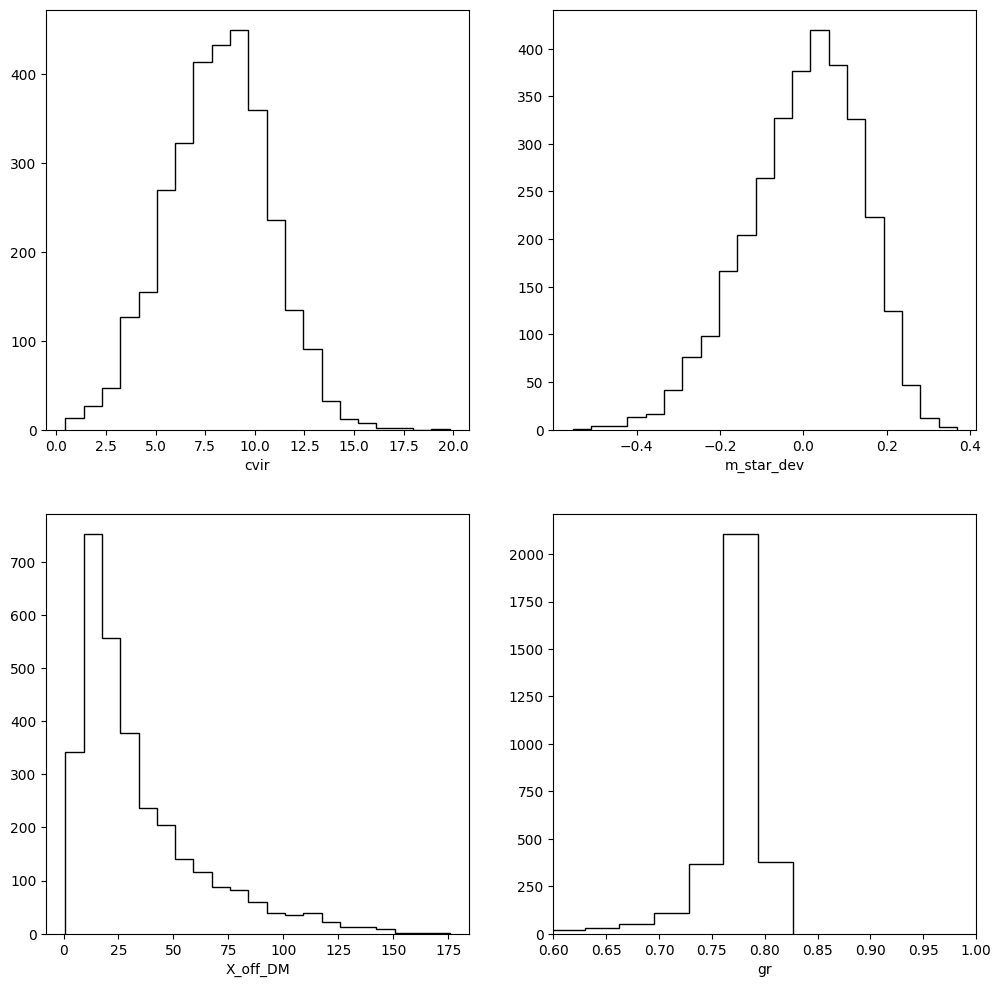

In [293]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axis = axes.flatten()
for p, ax in zip(params, axis):
    # plot histogram
    ax.hist(_cat[p], histtype='step', bins=21, color='k')
    ax.set_xlabel(p)

    if p == 'gr':
        # ax.set_yscale('log')


(array([  4.,   3.,   4.,   8.,   4.,   7.,   9.,  11.,   6.,   5.,  17.,
         22.,  21.,  34.,  23.,  36.,  50.,  73.,  98., 146., 250., 485.,
        677., 680., 297.,  69.,  12.,   4.,   1.,   0.,   0.]),
 array([0.60000002, 0.60806453, 0.61612904, 0.62419355, 0.63225806,
        0.64032257, 0.64838707, 0.65645164, 0.66451615, 0.67258066,
        0.68064517, 0.68870968, 0.69677418, 0.70483869, 0.7129032 ,
        0.72096777, 0.72903228, 0.73709679, 0.74516129, 0.7532258 ,
        0.76129031, 0.76935482, 0.77741933, 0.7854839 , 0.79354841,
        0.80161291, 0.80967742, 0.81774193, 0.82580644, 0.83387095,
        0.84193546, 0.85000002]),
 [<matplotlib.patches.Polygon at 0x135cf4df0>])

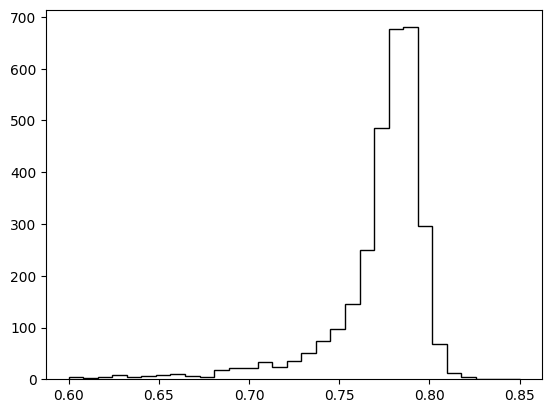

In [296]:
plt.hist(_cat['gr'], histtype='step', bins=31, color='k', range=(0.6, 0.85))


Text(0.5, 0, '$\\log M_{\\star}$')

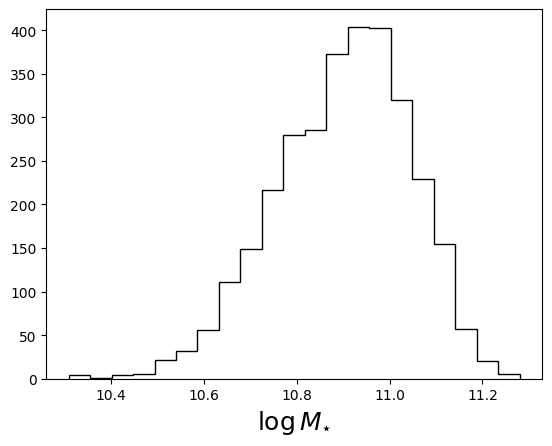

In [302]:
plt.hist(_cat['Mstar_30pkpc'], bins=21, histtype='step', color='k', label='M_{\star}');
plt.xlabel(r"$\log M_{\star}$", fontsize=18)


Text(0.5, 0, '$\\log {\\rm SFR}$')

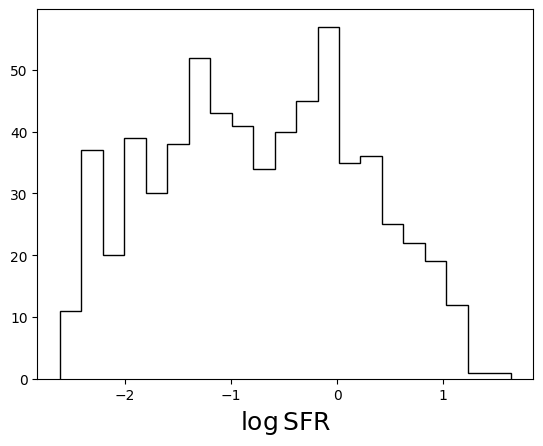

In [320]:
cond1 = _cat['SFR_30pkpc'] < np.inf
cond2 = _cat['SFR_30pkpc'] > -np.inf
sum(cond1 & cond2)

plt.hist(_cat['SFR_30pkpc'].values[cond1 & cond2], bins=21, histtype='step', color='k', label='SFR');
plt.xlabel(r"$\log {\rm SFR}$", fontsize=18)


# TNG300-1 Dark 

In [91]:
info_dark = _setup_mah_and_cat(dark_trees_file, present_dark_snapfile, metadata_file, SNAPS)


/var/folders/yl/5w7yl6bn1tsc5fjrdtsrsjhh0000gn/T/ipykernel_86628/3987759832.py:4: RuntimeWarning: divide by zero encountered in log10
  return np.where(gmass > 0, np.log10(gmass * 1e10 / TNG_H), 0)


In [92]:
dm_peak = info_dark['m_peak']
dcat = info_dark['present_cat']
scales = info_dark['scales']
len(dm_peak), len(dcat)


(3854, 3854)

In [93]:
dcat['Vmax_DM/V_vir_DM'] = _get_vmax_over_vvir(dcat)


In [94]:
# check ordering
[t['SubhaloGrNr'][-1] for t in info_dark['trees']][:10], info_dark['present_cat']['HaloID'].values[:10]


([8522, 5516, 9257, 4639, 2437, 7358, 4056, 7073, 3699, 4781],
 array([8522, 5516, 9257, 4639, 2437, 7358, 4056, 7073, 3699, 4781],
       dtype=int32))

(array([521., 501., 428., 391., 403., 388., 323., 320., 300., 279.]),
 array([12.80012512, 12.83010054, 12.86007595, 12.89005136, 12.92002678,
        12.95000219, 12.97997761, 13.00995302, 13.03992844, 13.06990385,
        13.09987926]),
 <BarContainer object of 10 artists>)

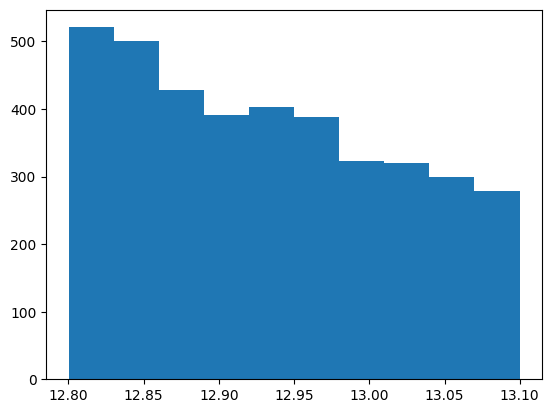

In [95]:
plt.hist(info_dark['gmass'])


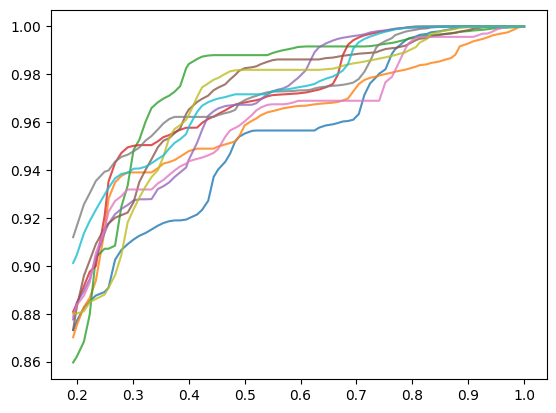

In [96]:
# plot some MAHs 
# plot 10 random m_peaks as a function of scale 
for ii in range(10):
    idx = np.random.randint(0, len(dm_peak))
    plt.plot(scales, dm_peak[idx], '-', alpha=0.8
    );


In [97]:
exclude = ["HaloID", "SubhaloID", "SubhaloID_LastDesc", 'Central', 'Main', 'EndState']
info_dark['present_cat'].columns


Index(['HaloID', 'SubhaloID', 'SubhaloID_LastDesc', 'Central', 'Main',
       'Mvir_TNG', 'Rvir_TNG', 'pos_x', 'pos_y', 'pos_z', 'vel_x', 'vel_y',
       'vel_z', 'delta_2cMpc', 'delta_5cMpc', 'delta_10cMpc', 'delta_20cMpc',
       'delta_40cMpc', 'cvir_init', 'cvir_init_err', 'rho_s_init',
       'rho_s_init_err', 'Bound_Nfrac', 'Bound_Mfrac', 'Bound_Nfrac_SUBFIND',
       'Rvir', 'Mvir', 'R200c', 'M200c', 'R500c', 'M500c', 'R2500c', 'M2500c',
       'Core_vel_x', 'Core_vel_y', 'Core_vel_z', 'Ngas', 'Nstars', 'Nbhs',
       'Nsat_Msub8', 'Nsat_Msub9', 'Nsat_Msub10', 'Nsat_Msub11', 'Nsat_Msub12',
       'Rhalf', 'cvir', 'cvir_err', 'rho_s', 'rho_s_err', 'M_s', 'M_4s',
       'Vmax_DM', 'Rmax_DM', 'Vmax_DM_self', 'Rmax_DM_self', 's_DM_noiter',
       'q_DM_noiter', 'A_DM_eig_x_noiter', 'A_DM_eig_y_noiter',
       'A_DM_eig_z_noiter', 'shapesDM_N_iter', 'shapesDM_N_partfrac',
       'shapesDM_N_part', 's_DM', 'q_DM', 's_DM_err', 'q_DM_err', 'A_DM_eig_x',
       'A_DM_eig_y', 'A_DM_eig_z'

In [99]:
# compute all spearman correlations for every quantity not in exclude
from multicam.correlations import spearmanr
dcorrs = {} 
for col in dcat.columns:
    if col not in exclude:
        dcorrs[col] = np.zeros(dm_peak.shape[1]) * np.nan
        for jj in range(dm_peak.shape[1]):
            dcorrs[col][jj] = spearmanr(dcat[col].values, dm_peak[:, jj])


/Users/imendoza/Library/Caches/pypoetry/virtualenvs/multicam-P7T5KfjX-py3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


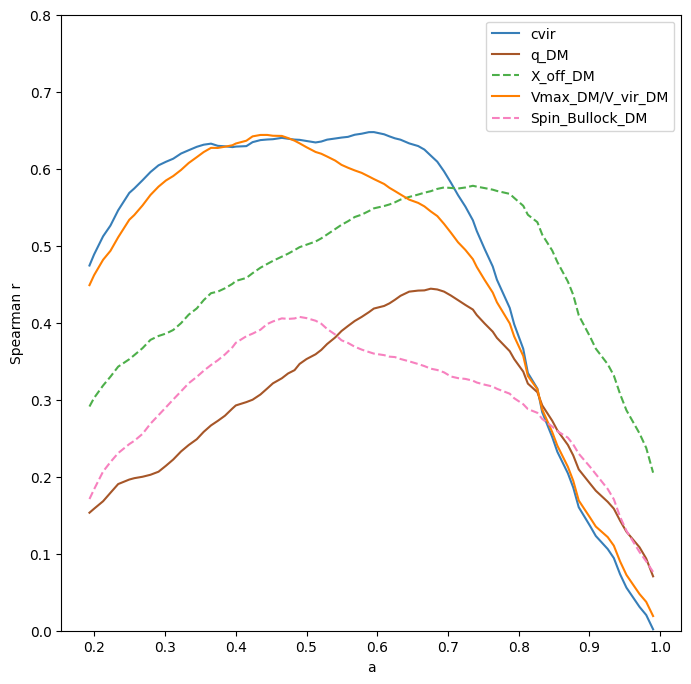

In [100]:
# now plot all correlations (separately), save to png
from multicam.plotting import CB_COLORS
colors_dict = {'cvir': CB_COLORS[0], 
               'Vmax_DM/V_vir_DM': CB_COLORS[1], 
               'X_off_DM': CB_COLORS[2], 
               'Spin_Bullock_DM': CB_COLORS[4],  
               'q_DM': CB_COLORS[5], }
params = {'cvir','Vmax_DM/V_vir_DM', 'X_off_DM', 'Spin_Bullock_DM',  'q_DM', }
assert params.issubset(set(dcat.columns))
assert params.issubset(set(corrs.keys()))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for param in params:
        sgn = (sum(corrs[param] > 0) - sum(corrs[param] < 0)) > 0
        style = '-' if sgn else '--'
        
        corr = np.abs(dcorrs[param])
        ax.plot(scales, corr, style, label=param, color=colors_dict[param])
        ax.set_xlabel("a")
        ax.set_ylabel("Spearman r")
ax.set_ylim(0, 0.8)
ax.legend(loc='best')
